# Linear Regression Model

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# นำเข้าข้อมูล

In [4]:
# นำเข้าข้อมูลจากไฟล์ CSV
data = pd.read_csv('DataComsci.csv')
# ดูตัวอย่างข้อมูล
print(data.describe())

print(data.columns.tolist())

data

       GRADUATEYEAR     STUDENTID  GPAgraduate
count    343.000000  3.430000e+02   343.000000
mean    2564.303207  1.002616e+08     2.610554
std        1.389672  1.621539e+04     0.413158
min     2562.000000  1.002056e+08     2.000000
25%     2563.000000  1.002492e+08     2.310000
50%     2564.000000  1.002611e+08     2.540000
75%     2566.000000  1.002712e+08     2.815000
max     2566.000000  1.002872e+08     3.970000
['GRADUATEYEAR', 'STUDENTID', 'AlgorithmDesignandAnalysis', 'ArtificialIntelligence', 'CalculusforScience', 'CommunicativeEnglishForAcademicAnalysisInComputerTechnology', 'CommunicativeEnglishForResearchPresentationInComputerTechnology', 'CommunicativeEnglishForSpecificPurposesInComputerTechnology', 'ComputerArchitecture', 'ComputerNetworkAndDataCommunication', 'DataMiningTechniques', 'DataScience', 'DataStructure', 'DatabaseSystems', 'DevelopmentalEnglish', 'DigitalImageProcessing', 'DigitalMarketing', 'DiscreteMathematicsForComputerScience', 'EnergyAndTechnologyAroundU

,GRADUATEYEAR,STUDENTID,AlgorithmDesignandAnalysis,ArtificialIntelligence,CalculusforScience,CommunicativeEnglishForAcademicAnalysisInComputerTechnology,CommunicativeEnglishForResearchPresentationInComputerTechnology,CommunicativeEnglishForSpecificPurposesInComputerTechnology,ComputerArchitecture,ComputerNetworkAndDataCommunication,...,PoliticsEconomyandSociety,ProgrammingLanguages,Seminar,SensingAndActuationForInternetOfThings,SoftwareEngineering,SpecialTopicsInComputerScience,StatisticalAnalysis,SystemAnalysisAndDesign,ThaiLanguageSkills,GPAgraduate
0,2562,100205568,D+,D+,D+,C,C,B+,D,D+,...,C,D,B,NaN,B+,NaN,F,C+,C+,2.10
1,2562,100205606,C,C+,D,B,C,B+,C,D,...,NaN,D,C+,NaN,D+,NaN,D,C,C,2.00
2,2564,100215265,D,F,F,A,A,A,C+,D,...,C+,D,B,NaN,C+,C+,D,C,C,2.01
3,2562,100225543,C,D,F,B,D+,D,D+,D+,...,NaN,D,B,NaN,D+,C,F,C+,C+,2.10
4,2565,100225544,D+,D,F,D+,C,D+,C+,D+,...,NaN,C,B,NaN,D+,NaN,D+,C,B,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2566,100282344,D+,C+,D,C,B+,B+,B+,D,...,NaN,NaN,A,B,C+,NaN,A,D+,NaN,2.34
339,2566,100282356,C+,A,C+,C,A,B,B+,C,...,NaN,NaN,A,B,A,NaN,A,B+,NaN,3.19
340,2566,100282359,D+,D,C,B,C+,B+,B+,C,...,NaN,NaN,A,B+,C+,NaN,B+,C+,NaN,2.68
341,2566,100282360,C+,D+,D,B,C+,B+,C+,C,...,NaN,NaN,A,B,B,NaN,A,C,NaN,2.52


# ขั้นตอนที่ 1: เตรียมข้อมูล

In [5]:
# แปลงเกรดเป็นค่าตัวเลข
grade_mapping = {'A': 4.0, 'B+': 3.5, 'B': 3.0, 'C+': 2.5, 'C': 2.0, 'D+': 1.5, 'D': 1.0, 'F': 0.0}
data.replace(grade_mapping, inplace=True)

# แทนค่าที่หายไปด้วยค่าเฉลี่ยของแต่ละคอลัมน์สำหรับคอลัมน์ตัวเลข
data.fillna(data.mean(numeric_only=True), inplace=True)

# เลือกฟีเจอร์ที่เกี่ยวข้อง (รายวิชาที่จะใช้ทำนาย GPA)
features = ['AlgorithmDesignandAnalysis', 'ArtificialIntelligence', 'CalculusforScience', 'CommunicativeEnglishForAcademicAnalysisInComputerTechnology', 
            'CommunicativeEnglishForResearchPresentationInComputerTechnology', 'CommunicativeEnglishForSpecificPurposesInComputerTechnology', 
            'ComputerArchitecture', 'ComputerNetworkAndDataCommunication', 'DataMiningTechniques', 'DataScience', 'DataStructure', 'DatabaseSystems', 
            'DevelopmentalEnglish', 'DigitalImageProcessing', 'DigitalMarketing', 'DiscreteMathematicsForComputerScience', 
            'EnergyAndTechnologyAroundUs', 'EnglishCriticalReadingForEffectiveCommunication', 'EnglishWritingForEffectiveCommunication', 
            'FundamentalEnglish', 'FundamentalLawsForQualityOfLife', 'FundamentalsOfProgramming', 'HistoryAndDevelopmentOfComputerTechnology', 
            'InternetProgramming', 'IntroductionToComputerInformationScience', 'IntroductionToRobotics', 'LanguageSocietyAndCulture', 'LifePrivacy', 
            'LifeSkills', 'LifeAndHealth', 'LinearAlgebraAndApplications', 'ManAndEnvironment', 'MathematicsForScience', 'MobileApplicationDevelopment', 
            'MultimediaApplicationDevelopment', 'MultimediaAnd WebTechnology', 'MusicStudiesInThaiCulture', 'ObjectOrientedProgramming', 
            'OperatingSystems', 'PhilosophyOfScience', 'PoliticsEconomyandSociety', 'ProgrammingLanguages', 'Seminar ', 
            'SensingAndActuationForInternetOfThings', 'SoftwareEngineering', 'SpecialTopicsInComputerScience', 'StatisticalAnalysis', 
            'SystemAnalysisAndDesign', 'ThaiLanguageSkills']  # แทนที่ด้วยรายชื่อฟีเจอร์ที่คุณต้องการ

X = data[features]  # สร้าง DataFrame สำหรับฟีเจอร์

# แปลงฟีเจอร์ที่เป็นประเภทข้อความ (categorical) ถ้ามี
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    # ลบค่า NaN และตรวจสอบให้แน่ใจว่าคอลัมน์มีประเภทข้อมูลเป็นข้อความอย่างเดียว
    if X[col].isnull().all():  # ตรวจสอบว่าคอลัมน์เป็น NaN ทั้งหมด
        continue
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # แปลงเป็นสตริงเพื่อหลีกเลี่ยงประเภทข้อมูลผสม
        label_encoders[col] = le

# ตัวแปรเป้าหมาย (GPA)
y = data['GPAgraduate']

### ตรวจสอบขนาดของ X และ y

In [6]:
print(X.shape)
print(y.shape)

(343, 49)
(343,)


# ขั้นตอนที่ 2: แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ขั้นตอนที่ 3: สร้างโมเดล Linear Regression และฝึกสอน

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# ขั้นตอนที่ 4: ประเมินผลโมเดล

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # คำนวณ Mean Squared Error
r2 = r2_score(y_test, y_pred)  # คำนวณ R-Squared

# แสดงค่า weights และ intercept
weights = model.coef_  # ค่าน้ำหนัก
intercept = model.intercept_  # ค่าตัดแกน


# แสดงผลลัพธ์

In [10]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared: {r2}')
print('')

print(f'Weights:, {weights}')
print(f'Intercept:, {intercept}')

Mean Squared Error (MSE): 0.0068532627399492795
R-Squared: 0.9477031457484406

Weights:, [ 0.03999226  0.03654207  0.03715521  0.00242117  0.00907116  0.01690386
  0.0409148   0.01726059  0.02471172  0.00890444  0.0256552   0.03383589
  0.03109351  0.02114285  0.01979913  0.02253898  0.04681021  0.10408949
  0.05210617 -0.09237783  0.03861138  0.01579276  0.03371623  0.02457683
  0.00789859  0.03177483  0.04273987  0.0434306   0.01324187  0.06743211
  0.03756241  0.03679655  0.02377036  0.01200512  0.01073271  0.03085707
  0.0454151   0.01068671  0.04410361 -0.04005191  0.03580468  0.01239945
  0.00262029  0.04473104  0.04246793  0.0462483   0.02651571  0.03196562
  0.04796194]
Intercept:, -1.0826614340853031


# กราฟแสดงผล

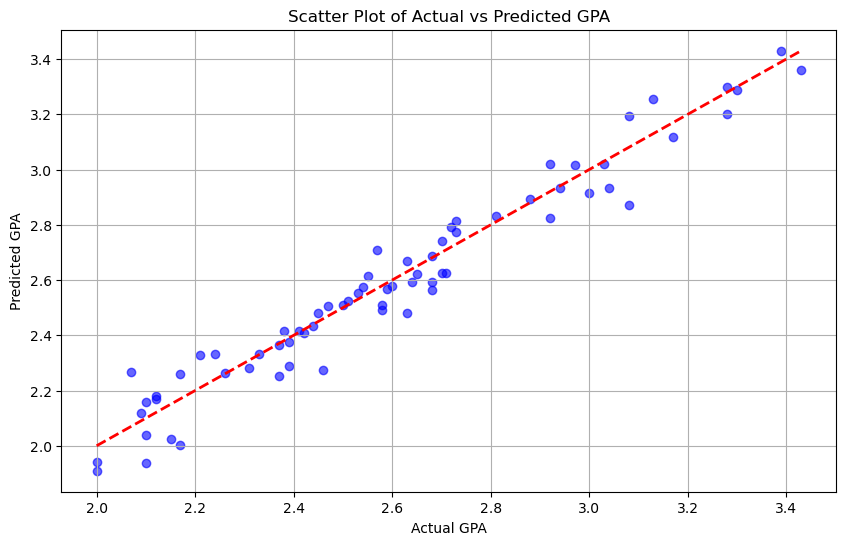

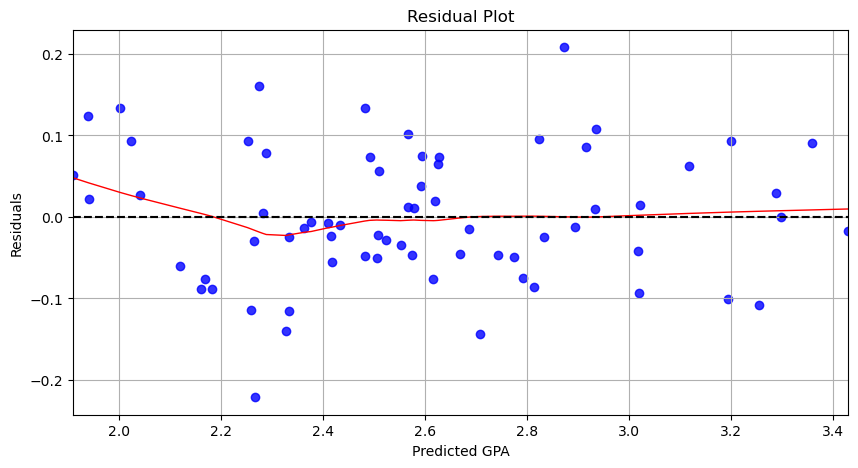

In [11]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, linestyle='--')  # เส้น y = x
plt.title('Scatter Plot of Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.grid()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, linestyle='--', color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted GPA')
plt.ylabel('Residuals')
plt.grid()
plt.show()
